<a href="https://colab.research.google.com/github/Likhita-T/FutureMakers/blob/main/Sarcasm_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
# loading dataset
df = pd.read_json("/content/gdrive/MyDrive/Dataset/Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
df = df.drop(['article_link'], axis=1)
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


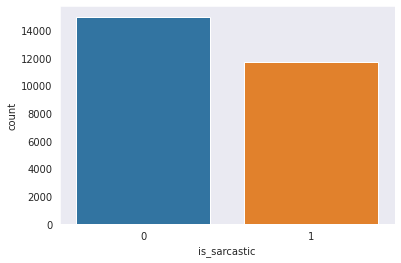

In [ ]:
# plotting class distribution
sns.set_style("dark")
sns.countplot(df.is_sarcastic)

In [ ]:
# printing number of data examples
df.is_sarcastic.value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [ ]:
# printing total number of data examples
len(df.is_sarcastic)

26709

In [ ]:
# defining X and Y
X = df.iloc[:, 0]
Y = df.iloc[:, 1]
print(X)

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object


In [ ]:
# splitting dataset into test and train sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
len(X_train)

21367

In [ ]:
# data preprocessing
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
sequences_matrix.shape

(21367, 150)

In [ ]:
sequences_matrix

array([[  0,   0,   0, ...,  21,  14,   3],
       [  0,   0,   0, ..., 928, 373,  36],
       [  0,   0,   0, ..., 857, 116, 618],
       ...,
       [  0,   0,   0, ...,   3,   2,   3],
       [  0,   0,   0, ...,  43,   2,  16],
       [  0,   0,   0, ...,   0,   0,  65]], dtype=int32)

In [ ]:
np.amax(sequences_matrix)

999

In [ ]:
# defining RNN model
def RNN():
  inputs = Input(name='inputs', shape=[max_len])
  layer = Embedding(max_words, 50, input_length=max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256, name="FCI")(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.2)(layer)
  layer = Dense(1, name='out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs=inputs, outputs=layer)
  return model

In [ ]:
# compiling
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FCI (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [ ]:
# Fitting Model
history = model.fit(sequences_matrix, Y_train, batch_size=100, epochs=5, validation_split=0.1)

Epoch 1/5
193/193 [==============================] - 24s 15ms/step - loss: 0.5590 - accuracy: 0.6910 - val_loss: 0.3954 - val_accuracy: 0.8114
Epoch 2/5
193/193 [==============================] - 2s 11ms/step - loss: 0.3738 - accuracy: 0.8312 - val_loss: 0.3842 - val_accuracy: 0.8175
Epoch 3/5
193/193 [==============================] - 2s 11ms/step - loss: 0.4344 - accuracy: 0.8322 - val_loss: 0.3857 - val_accuracy: 0.8156
Epoch 4/5
193/193 [==============================] - 2s 11ms/step - loss: 0.3444 - accuracy: 0.8478 - val_loss: 0.3854 - val_accuracy: 0.8184
Epoch 5/5
193/193 [==============================] - 2s 11ms/step - loss: 0.3336 - accuracy: 0.8517 - val_loss: 0.3797 - val_accuracy: 0.8198


In [ ]:
# Evaluting on test set
test_Sequences = tok.texts_to_sequences(X_test)
test_Sequences_matrix = sequence.pad_sequences(test_Sequences, maxlen=max_len)
test_Sequences_matrix.shape

(5342, 150)

In [ ]:
accr = model.evaluate(test_Sequences_matrix, Y_test)
print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(accr[0], accr[1]))

167/167 [==============================] - 1s 5ms/step - loss: 0.3831 - accuracy: 0.8253
Test set
 Loss: 0.383
 Accuracy: 0.825
